### 各種import

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

### 楽曲データを読み込む
- あらかじめ取り出しておいた楽曲データを`tracks.json`として保存しておき，データフレームとして読み込む

In [4]:
with open('tracks.json', 'r') as f:
    df = pd.read_json(f).set_index('id')

df.sample(5)

,class,index,name,persistentID,databaseID,dateAdded,time,duration,artist,albumArtist,...,albumDisliked,cloudStatus,work,movement,movementNumber,movementCount,location,purchaserName,purchaserAppleID,releaseDate
id,,,,,,,,,,,,,,,,,,,,,
31856,sharedTrack,4166,Still Love You,6C14343274F7FCA5,12131,2016-09-08T09:41:43.000Z,4:14,254.667007,Shiggy Jr.,Shiggy Jr.,...,False,subscription,,,0,0,NaN,NaN,NaN,2016-05-20T12:00:00.000Z
32878,sharedTrack,2246,からだ,2FF9DD6180EE39B9,15747,2019-01-09T11:33:58.000Z,3:01,181.067001,岡崎体育,岡崎体育,...,False,subscription,,,0,0,NaN,NaN,NaN,2019-01-09T12:00:00.000Z
29207,fileTrack,4453,残り風,85BD6571F76E2CE6,5131,2014-06-18T14:00:21.000Z,5:15,315.950989,いきものがかり,いきものがかり,...,False,uploaded,,,0,0,NaN,NaN,NaN,NaN
33306,sharedTrack,3760,Like the wind,953DF012D19CD99D,18013,2019-07-21T14:44:34.000Z,4:02,242.102005,Key,Key,...,False,uploaded,,,0,0,NaN,NaN,NaN,NaN
30298,fileTrack,1243,恋のエチュード,D485413FD94868B1,8397,2015-04-27T00:53:58.000Z,3:32,212.865997,PUFFY,VARIOUS ARTISTS,...,False,uploaded,,,0,0,{},NaN,NaN,NaN


### 楽曲ごとにランキング
- 楽曲名でグルーピングを行い再生回数を集計

In [61]:
df.groupby('name') \
    .apply(lambda df: pd.Series([df.albumArtist.iloc[0], sum(df.playedCount)], index=['artist', 'playedCount'])) \
    .sort_values('playedCount', ascending=False) \
    .head(10) \
    .reset_index()

,name,artist,playedCount
0,シアワセ,aiko,405
1,恋のスーパーボール,aiko,373
2,夢見る隙間,aiko,346
3,花火,aiko,345
4,もっと,aiko,326
5,向かいあわせ,aiko,325
6,ストロー,aiko,313
7,かばん,aiko,301
8,Loveletter,aiko,298
9,蝶々結び,aiko,292


### アーティストごとの再生回数

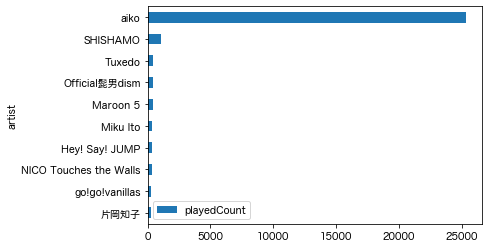

In [62]:
df.groupby('artist')['playedCount'].sum() \
    .drop('') \
    .drop('VARIOUS ARTISTS') \
    .sort_values(ascending=True) \
    .tail(10) \
    .to_frame() \
    .plot(kind='barh')

### 2019年アツかった楽曲

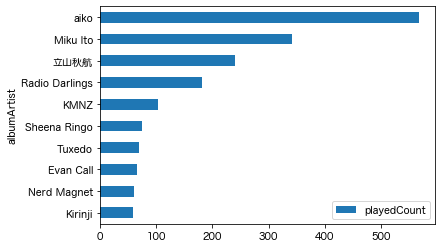

In [64]:
df[df.dateAdded > '2019'] \
    .groupby('albumArtist')['playedCount'].sum() \
    .sort_values(ascending=True) \
    .tail(10) \
    .to_frame() \
    .plot(kind='barh')

### 特定アーティストのみ抽出
- aikoのアルバム再生数で集計

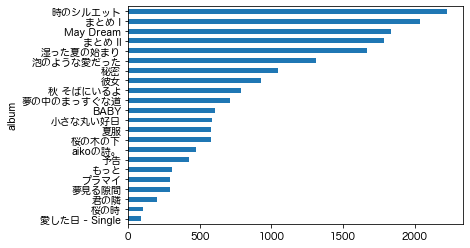

In [6]:
df[df.albumArtist == "aiko"] \
    .groupby('album')['playedCount'].sum() \
    .sort_values(ascending=True) \
    .plot(kind='barh')